# Intro to ML - O'Reilly Book!

This notebook will show my walkthrough Chapter 1!

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import mglearn
%matplotlib inline

In [2]:
iris_dataset = load_iris()

In [3]:
type(iris_dataset)

sklearn.datasets.base.Bunch

A Bunch type is similar to a dictionary!

In [4]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['DESCR', 'target_names', 'target', 'feature_names', 'data'])


In [5]:
# print(format(iris_dataset['DESCR'])) #--  does a pretty print

In [6]:
species_to_predict_name = iris_dataset['target_names']

In [7]:
species_to_predict_name

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [8]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
dataset_X = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

In [10]:
dataset_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
dataset_y =pd.DataFrame(iris_dataset['target'])

In [12]:
dataset_y.head()

,0
0,0
1,0
2,0
3,0
4,0


Where 0 is setosa, 1 is versicolor and 2 is virgincia

To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected (here, our 150 flower measurements) into two parts. One part of the data is used to build our machine learning model, and is called the training data or training set. The rest of the data will be used to assess how well the model works; this is called the test data, test set, or hold-out set.

train_test_split defaults to 75 training and 25 testing.

The fucntion also shuffles the dataset too! Ensuring we dont just take the last 25% of observations.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

Inspecting the Data

Lets create pair plots to look at the data!

In [14]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

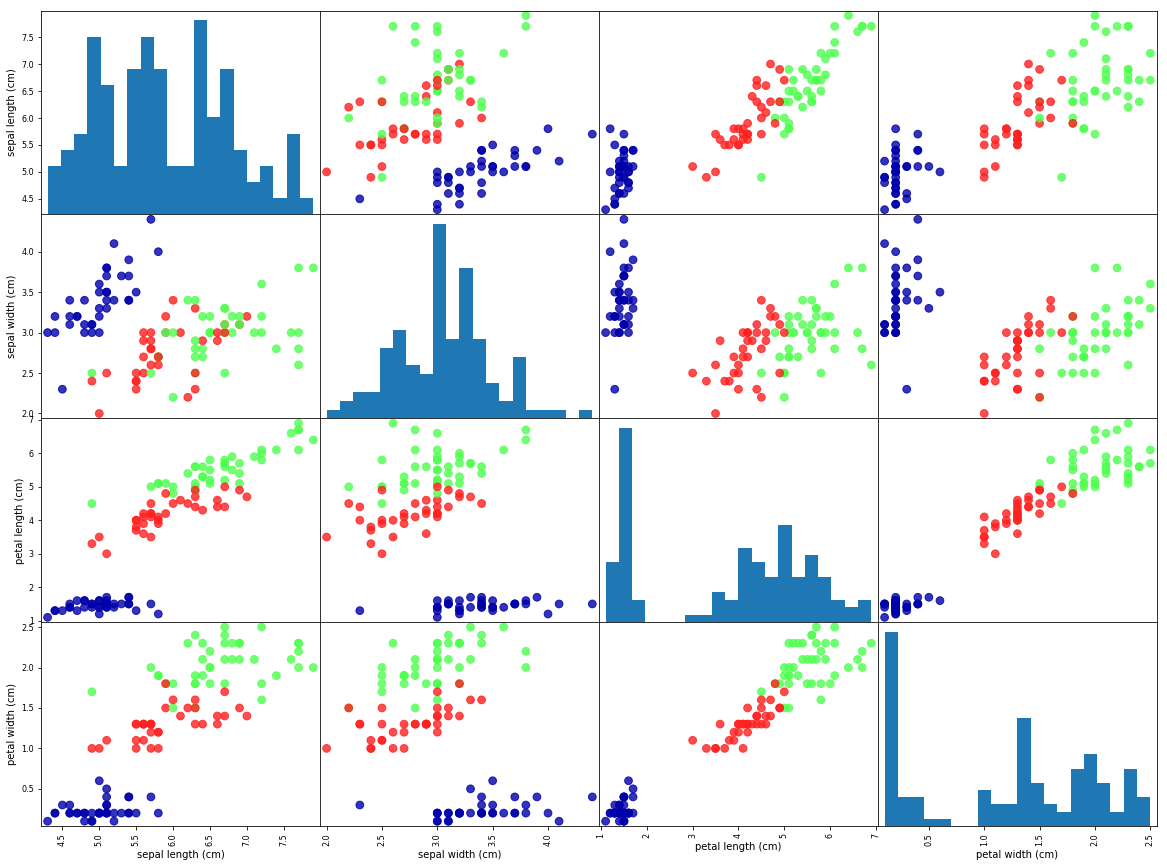

In [15]:
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(20,15), marker='o', hist_kwds={'bins':20},
                        s=60, alpha=0.8, cmap=mglearn.cm3)

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.


In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
# X_new = np.array([[5, 2.9, 1, 0.2]])

In [19]:
# X_new.shape #of the appropriate shape!

In [20]:
# prediction = knn.predict(X_new)
# print("Prediction: {}".format(prediction[0]))
# print("Predicted target name: {}".format(
#     iris_dataset['target_names'][prediction][0]))

Our model predicts that this new iris belongs to the class 0, meaning its species is setosa. But how do we know whether we can trust our model? We don’t know the cor‐ rect species of this sample, which is the whole point of building the model!

In [21]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [23]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test))) #once the KNN object is fitted - can use this method!

Test set score: 0.97


Below is how all the code for this section could be condensed:

In [24]:
#  X_train, X_test, y_train, y_test = train_test_split(
#         iris_dataset['data'], iris_dataset['target'], random_state=0)
#     knn = KNeighborsClassifier(n_neighbors=1)
#     knn.fit(X_train, y_train)
# print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

This is quite a high accuracy -  later on we will discuss further evaluation metrics!